![Alt text](https://www.saintpeters.edu/wp-content/uploads/blogs.dir/230/files/2022/11/SPU-Sesq-1.png)


# Student Information

<table style="width:100%">
  <tr>
    <td style="text-align:left"><font color="green"><b>Contributor 1:</b></font></td>
    <td style="text-align:left"><b>Jennifer Valencia</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Contributor 2:</b></font></td>
    <td style="text-align:left"><b>Joyail Tokas</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="purple"><b>Class:</b></font></td>
    <td style="text-align:left"><b>DS-600: Data Mining</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="orange"><b>Task:</b></font></td>
    <td style="text-align:left"><b>Capstone Project.</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="brown"><b>Topic:</b></font></td>
    <td style="text-align:left"><b>AI Powered Phishing Attack Detection</b></td>
  </tr>
</table>


# AI Powered Phishing Attack Detection

#### Business Needs:
Phishing attacks pose a significant threat to individuals and organizations by tricking victims into disclosing sensitive information. To combat this, there is a pressing need for an effective detection system that can differentiate between legitimate and phishing URLs.

#### Problem Statement:
Phishing is a type of anomaly that consists of malicious attacks intended to trick people into divulging sensitive information (Justindhas et. al., 2023). They are frequently formatted as URLs that mimic legitimate websites. Failure to identify these attacks can result in significant repercussions, such as identity theft, malware distribution, financial threats, and security breaches.

#### Objective:
This project will incorporate machine learning algorithms to identify potential phishing attempts through deceptive URLs. Some approaches to be explored include K-Means Clustering, DBSCAN, Support Vector Machine, and Deep Learning. The models will be trained and tested using the PhiUSIIL Phishing URL Dataset from UC Irvine Machine Learning Repository, which comprises 134,850 legitimate and 100,945 phishing URLs. The performance of each of the models will be evaluated to determine which one achieves the highest accuracy when distinguishing between legitimate and illegitimate URLs.

#### References:
Justindhas, Y., Raghul, V., Pramadeish S., Prakash, S. (2024). A Comprehensive Review on An Ensemble-Based Machine Learning Approach for Phishing Website Detection. In 2024 2nd International Conference on Computer, Communication and Control (IC4), 1-6, https://ieeexplore.ieee.org/document/10486561

Prasad, A. & Chandra, S. (2024). PhiUSIIL Phishing URL (Website). UCI Machine Learning Repository. https://doi.org/10.1016/j.cose.2023.103545

#### Credits:
| Image                      | First Name | Last Name       | Student ID | Class Level |
|----------------------------|------------|-----------------|------------|-------------|
| <img src="../Media_Files/Jennifer_Valencia.jpeg" alt="Jennifer Valencia" width="100"/> | Jennifer   | Valencia      | 0865975    | Graduate    |
| <img src="../Media_Files/Joyail_Tokas.jpeg" alt="Joyail Tokas" width="100"/> | Joyail     | Tokas         | 1030128    | Graduate    |


---


## <span style="color:purple">📝 Task 1:</span> Data Acquisition & EDA Process

✅ Exploratory Data Analysis: Installing all the project required libraries

In [5]:
## Required Libraries 
import numpy as np # For Math/linear algebra
import pandas as pd # For Data processing
import io
from io import StringIO

## Data Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches 


## Time Series Data Libraries 
import datetime
from datetime import timedelta

## ML Metric Performance Library
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

##Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Markdown comments design 
from IPython.display import display, Markdown
import emoji
from IPython.core.display import display, HTML

# Ensure all output is displayed from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modify the CSS style of the output cell to manage the overflow
from IPython.display import display, HTML, Markdown
display(HTML("""
<style>
.output {
    display: block;
    max-height: 1800px; 
    overflow-y: auto;  
    overflow-x: auto; 
}
</style>
"""))

# Increase the maximum rows displayed in output
import pandas as pd
pd.set_option('display.max_rows', 1500)

## Label Encoding 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

![Alt text](https://miro.medium.com/v2/resize:fit:1400/1*kEgCUgZmYnFXcZ253UiIDQ.png)

✅ Exploratory Data Analysis: Acquiring the dataset

In [7]:
# Read the dataset into a pandas DataFrame
phish = pd.read_csv('../Dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
phish.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


Exploring a pandas DataFrame involves key methods for in-depth analysis:

- **data.describe():** Provides statistical summaries for numerical columns.
- **data.info():** Details the DataFrame's structure, data types, and missing values.
- **data.shape:** Shows the total number of rows and columns, indicating the dataset's size and scope.

![Alt text](https://res.cloudinary.com/practicaldev/image/fetch/s--uCYTIuwT--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/3hn73nplm0nv0ct18vg0.jpg)

## a)- Descriptive Analysis:

In [8]:
phish.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [9]:
def summarize_dataset(dataframe):
    """
    This function would summarize our exam pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be summarized.

    Returns:
    pd.DataFrame: DataFrame containing summary information including non-null counts and data types.
    pd.DataFrame: DataFrame containing the number of rows and columns.
    """
    # Extracting info as DataFrame
    info_df = pd.DataFrame(dataframe.dtypes).reset_index()
    info_df.columns = ['Column', 'Data Type']
    info_df['Non-Null Count'] = dataframe.notnull().sum().values

    # Creating a DataFrame for shape
    shape_df = pd.DataFrame({'Aspect': ['Number of Rows', 'Number of Columns'],
                             'Value': [dataframe.shape[0], dataframe.shape[1]]})

    return info_df, shape_df

# Applying the function to the loaded data
dataset_info_df, dataset_shape_df = summarize_dataset(phish)

In [10]:
dataset_info_df

,Column,Data Type,Non-Null Count
0,FILENAME,object,235795
1,URL,object,235795
2,URLLength,int64,235795
3,Domain,object,235795
4,DomainLength,int64,235795
5,IsDomainIP,int64,235795
6,TLD,object,235795
7,URLSimilarityIndex,float64,235795
8,CharContinuationRate,float64,235795
9,TLDLegitimateProb,float64,235795


In [11]:
dataset_shape_df

,Aspect,Value
0,Number of Rows,235795
1,Number of Columns,56


## b)- Detection and Treatment of MISSING DATA:

In [12]:
def count_null_values(dataframe):
    """
    Function to count null values in each column of a pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be analyzed.

    Returns:
    pd.DataFrame: DataFrame containing the count of null values in each column.
    """
    null_counts = dataframe.isnull().sum()
    null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
    null_counts_df = null_counts_df[null_counts_df['Null Count'] > 0].reset_index()
    null_counts_df.rename(columns={'index': 'Column'}, inplace=True)
    return null_counts_df

# Applying the function to the renamed data
null_counts_df = count_null_values(phish)
null_counts_df

,Column,Null Count


## C)- Exploratory Data Analysis (EDA)

In [13]:
def plot_histogram(dataframe, column, bins=30):
    """
    Plot a histogram for a specific column.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    bins (int): Number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column], bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_countplot(dataframe, column):
    """
    Plot a count plot for a specific column.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

def plot_correlation_matrix(dataframe):
    """
    Plot a correlation matrix for the DataFrame.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    """
    plt.figure(figsize=(16, 12))
    corr = dataframe.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

def plot_boxplot(dataframe, column):
    """
    Plot a boxplot for a specific column.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

def plot_pairplot(dataframe, columns):
    """
    Plot a pairplot for specific columns.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    columns (list): List of columns to plot.
    """
    sns.pairplot(dataframe[columns], diag_kind='kde')
    plt.show()

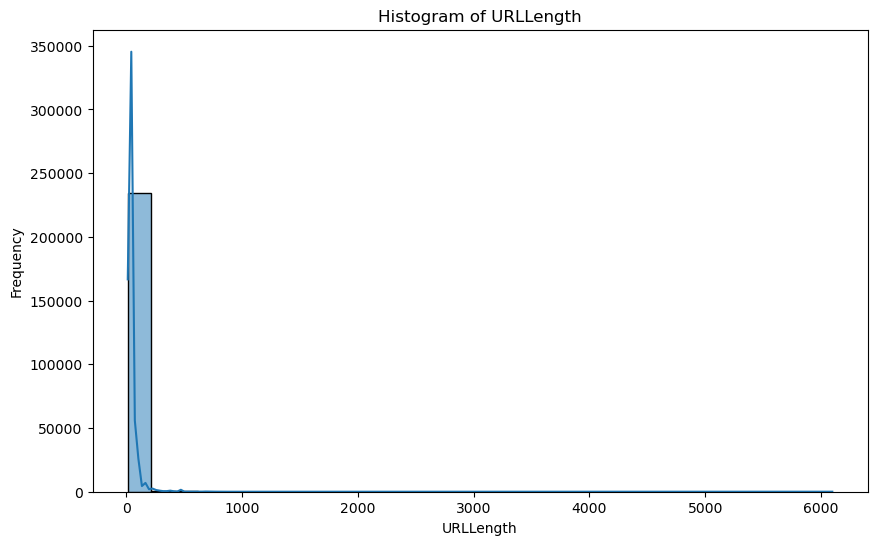

In [14]:
plot_histogram(phish, 'URLLength')

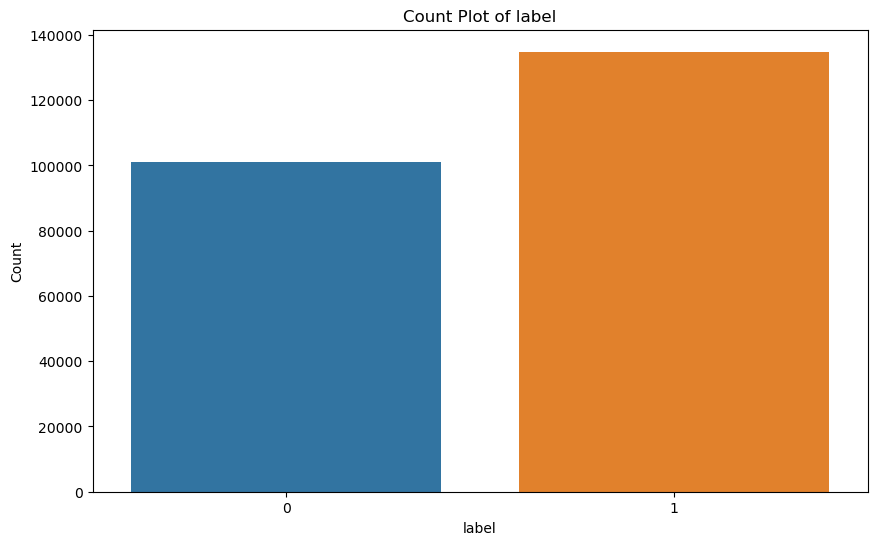

In [15]:
plot_countplot(phish, 'label')

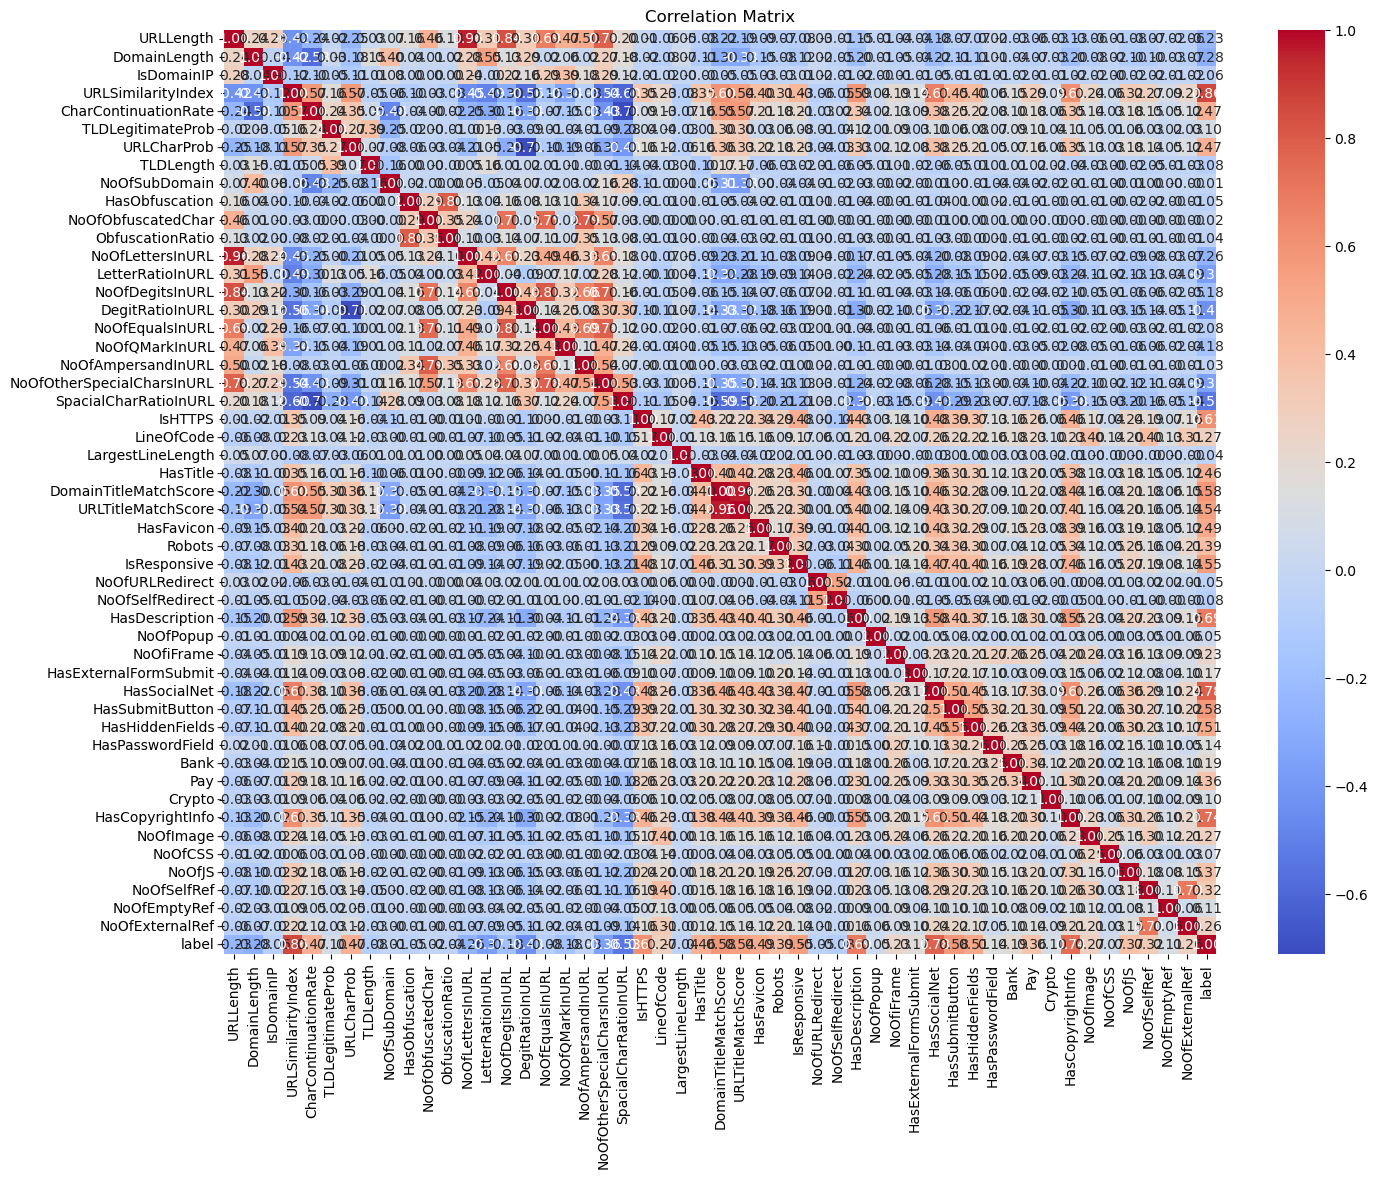

In [16]:
plot_correlation_matrix(phish)

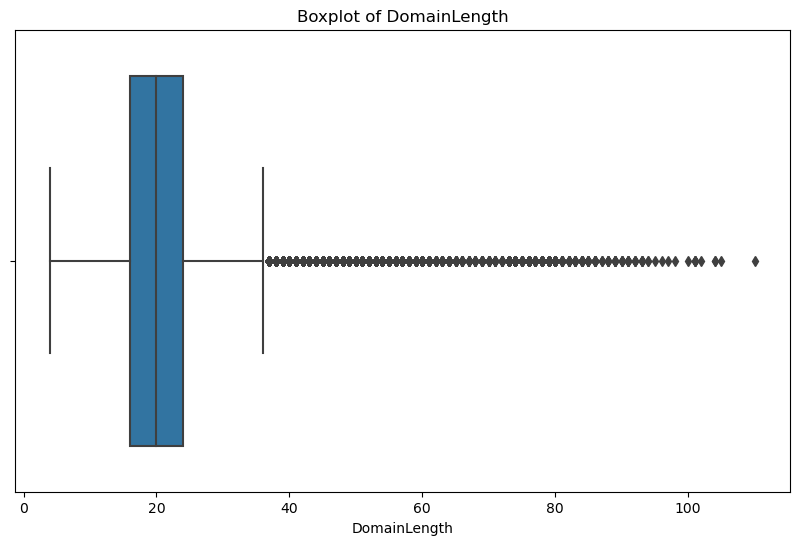

In [17]:
plot_boxplot(phish, 'DomainLength')

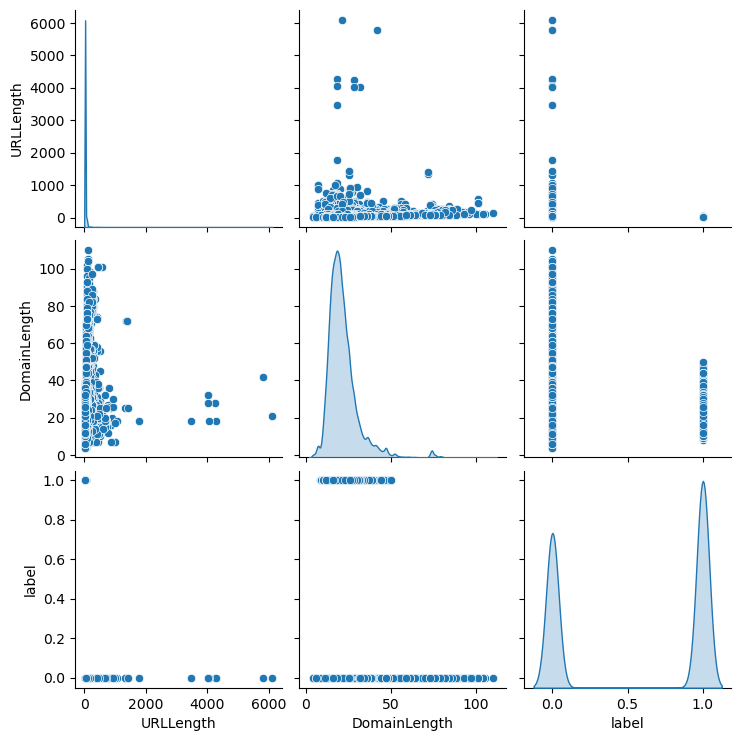

In [18]:
pairplot_columns = ['URLLength', 'DomainLength', 'label']
plot_pairplot(phish, pairplot_columns)

## d)- Feature Analysis

In [22]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance(dataframe, target_column):
    """
    Calculate and plot feature importance using RandomForest.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    target_column (str): The target column for prediction.
    """
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

    return feature_importance_df

In [23]:
# Calculate and plot feature importance
feature_importance_df = feature_importance(phish, 'label')

ValueError: could not convert string to float: '521848.txt'

## <span style="color:purple">📝 Task 2:</span> Dataset Enrichment for Domain Name Scoring System


## <span style="color:purple">📝 Task 3:</span> Pre- Model Deployment & Analysis  


## <span style="color:purple">📝 Task 4:</span> Predictive Analysis  


## <span style="color:purple">📝 Task 5:</span>  Final Conclusion
